In [125]:
import pandas as pd
import os
import pickle
from functools import reduce
from tqdm import tqdm
import matplotlib as plt


ModuleNotFoundError: No module named 'matplotlib'

In [118]:
file_path = "../../data/HES/HES_processed.pkl"

device_dict = pd.read_pickle(file_path)


In [119]:


# Initialize an empty list to store device dataframes
dfs = []

# Iterate over each device
for device in tqdm(device_dict):
    # Concatenate all daily dataframes for the current device
    device_df = pd.concat(device_dict[device], axis=0)
    # Reset the index (to handle any potential index related issues)
    device_df = device_df.reset_index()
    # Rename the columns to include the device name for uniqueness
    device_df.columns = ['date', device]
    # Append the device dataframe to the list
    dfs.append(device_df)

# Merge all device dataframes into a single dataframe
combined_df = reduce(lambda left,right: pd.merge(left,right,on='date', how='outer'), dfs)


100%|██████████| 39/39 [00:06<00:00,  6.27it/s]


In [143]:

combined_df.head()

# show the data from august
combined_df[combined_df.index.month == 8].head()


,dishwasher,treadmill,car charger,microwave,fridge,air exchanger,heat bedroom #1,heat bedroom #2,heat kitchen,heat living room,...,secondary outlets,washing machine,air conditioning,basement/powder room outlets,kitchen outlet #1,kitchen outlet #2,kitchen outlet #3,kitchen outlet #4,dryer,towel dryer
date,,,,,,,,,,,,,,,,,,,,,


In [121]:
# set date as index
combined_df.set_index('date', inplace=True)



combined_df = watts2kwh(combined_df)

In [123]:
# resample to given interval
def resample2interval(interval, df : pd.DataFrame):
    df = df.resample(interval).sum()
    return df

def watts2kwh(df):
    df = df/1000 * 7/3600
    return df

In [ ]:
daily_average_consumption = period_average_consumption("D", combined_df)
weeeekly_average_consumption = period_average_consumption("W", combined_df)
monthly_average_consumption = period_average_consumption("M", combined_df)


meta_data = pd.DataFrame()
devices = list(combined_df.columns)
devices.append('total')
meta_data['device'] = devices


# # add total average consumption
daily_average_consumption['total'] = daily_average_consumption.sum()
weeeekly_average_consumption['total'] = weeeekly_average_consumption.sum(axis=0)
monthly_average_consumption['total'] = monthly_average_consumption.sum(axis=0)

meta_data["daily_avg"] = daily_average_consumption.values
meta_data["weekly_avg"] = weeeekly_average_consumption.values
meta_data["monthly_avg"] = monthly_average_consumption.values

meta_data.head(1000)

In [154]:
# resample to needed intervals
hourly = resample2interval("H", combined_df)
daily = resample2interval("D", combined_df)


# daily load profile
loadprofile_daily = hourly.groupby(hourly.index.hour).mean()
# add total consumption
loadprofile_daily["total"] = loadprofile_daily.sum(axis=1)

# weekly load profile
loadprofile_weekly = daily.groupby(daily.index.dayofweek).mean()
# add total consumption
loadprofile_weekly["total"] = loadprofile_weekly.sum(axis=1)

# monthly load profile
loadprofile_monthly = daily.groupby(daily.index.day).mean()
# add total consumption
loadprofile_monthly["total"] = loadprofile_monthly.sum(axis=1)




In [155]:
loadprofile_monthly.head(1000)

,dishwasher,treadmill,car charger,microwave,fridge,air exchanger,heat bedroom #1,heat bedroom #2,heat kitchen,heat living room,...,washing machine,air conditioning,basement/powder room outlets,kitchen outlet #1,kitchen outlet #2,kitchen outlet #3,kitchen outlet #4,dryer,towel dryer,total
date,,,,,,,,,,,,,,,,,,,,,
1,1.468142,1.166734,1.896565,3.367082,2.515658,0.537942,0.473769,4.367850,0.524225,0.401076,...,1.544099,4.391011,2.415700,0.575341,0.810818,0.771569,0.751019,1.411995,0.600787,65.042832
2,1.254755,1.248322,1.775057,3.622403,2.520762,0.528317,0.458078,4.333343,0.505423,0.398851,...,1.678129,4.451773,2.486405,0.579541,0.799110,0.708708,0.762480,1.401170,0.587139,65.926776
3,1.436742,1.189268,2.651745,3.801839,2.386366,0.573852,0.473973,4.467307,0.530833,0.408010,...,1.756685,3.962313,2.413184,0.604620,0.799079,0.748007,0.890689,1.540059,0.561121,67.413588
4,1.776205,1.101031,3.131701,3.360514,2.342122,0.609220,0.496280,4.330859,0.574780,0.413499,...,1.565953,3.400019,1.988574,0.565851,0.796058,0.787011,0.747724,1.304049,0.627173,65.091670
5,1.617017,1.183516,3.504148,3.399945,2.308915,0.591812,0.469085,4.255766,0.525571,0.400606,...,1.665052,3.803235,1.683532,0.636009,0.789973,0.808130,0.875273,1.972857,0.638573,65.633407
6,1.051267,0.825539,2.252398,2.488547,1.488094,0.383673,0.306094,2.818821,0.330925,0.266338,...,1.124038,1.234657,0.679295,0.419451,0.519747,0.788381,0.600863,0.822030,0.386445,42.976894
7,1.537636,1.247384,2.381735,3.884925,2.094373,0.554941,0.468765,4.263679,0.520537,0.408279,...,1.767650,1.109862,0.947226,0.605336,0.783740,0.704618,0.702831,1.419977,0.618924,62.755578
8,1.296160,1.147550,2.360055,3.393286,2.225331,0.539718,0.457864,4.319375,0.511795,0.403302,...,1.633505,2.089447,1.689708,0.575058,0.772747,0.751737,0.736675,1.214777,0.613402,61.059262
9,1.284879,1.148961,1.934158,3.405698,2.254313,0.528057,0.464017,4.334791,0.524433,0.407086,...,1.636152,1.966828,1.841806,0.566562,0.776553,0.719074,0.723858,1.538135,0.583621,61.267395


<Axes: title={'center': 'Average Daily Load Profile'}, xlabel='Hour', ylabel='Power (kWh)'>

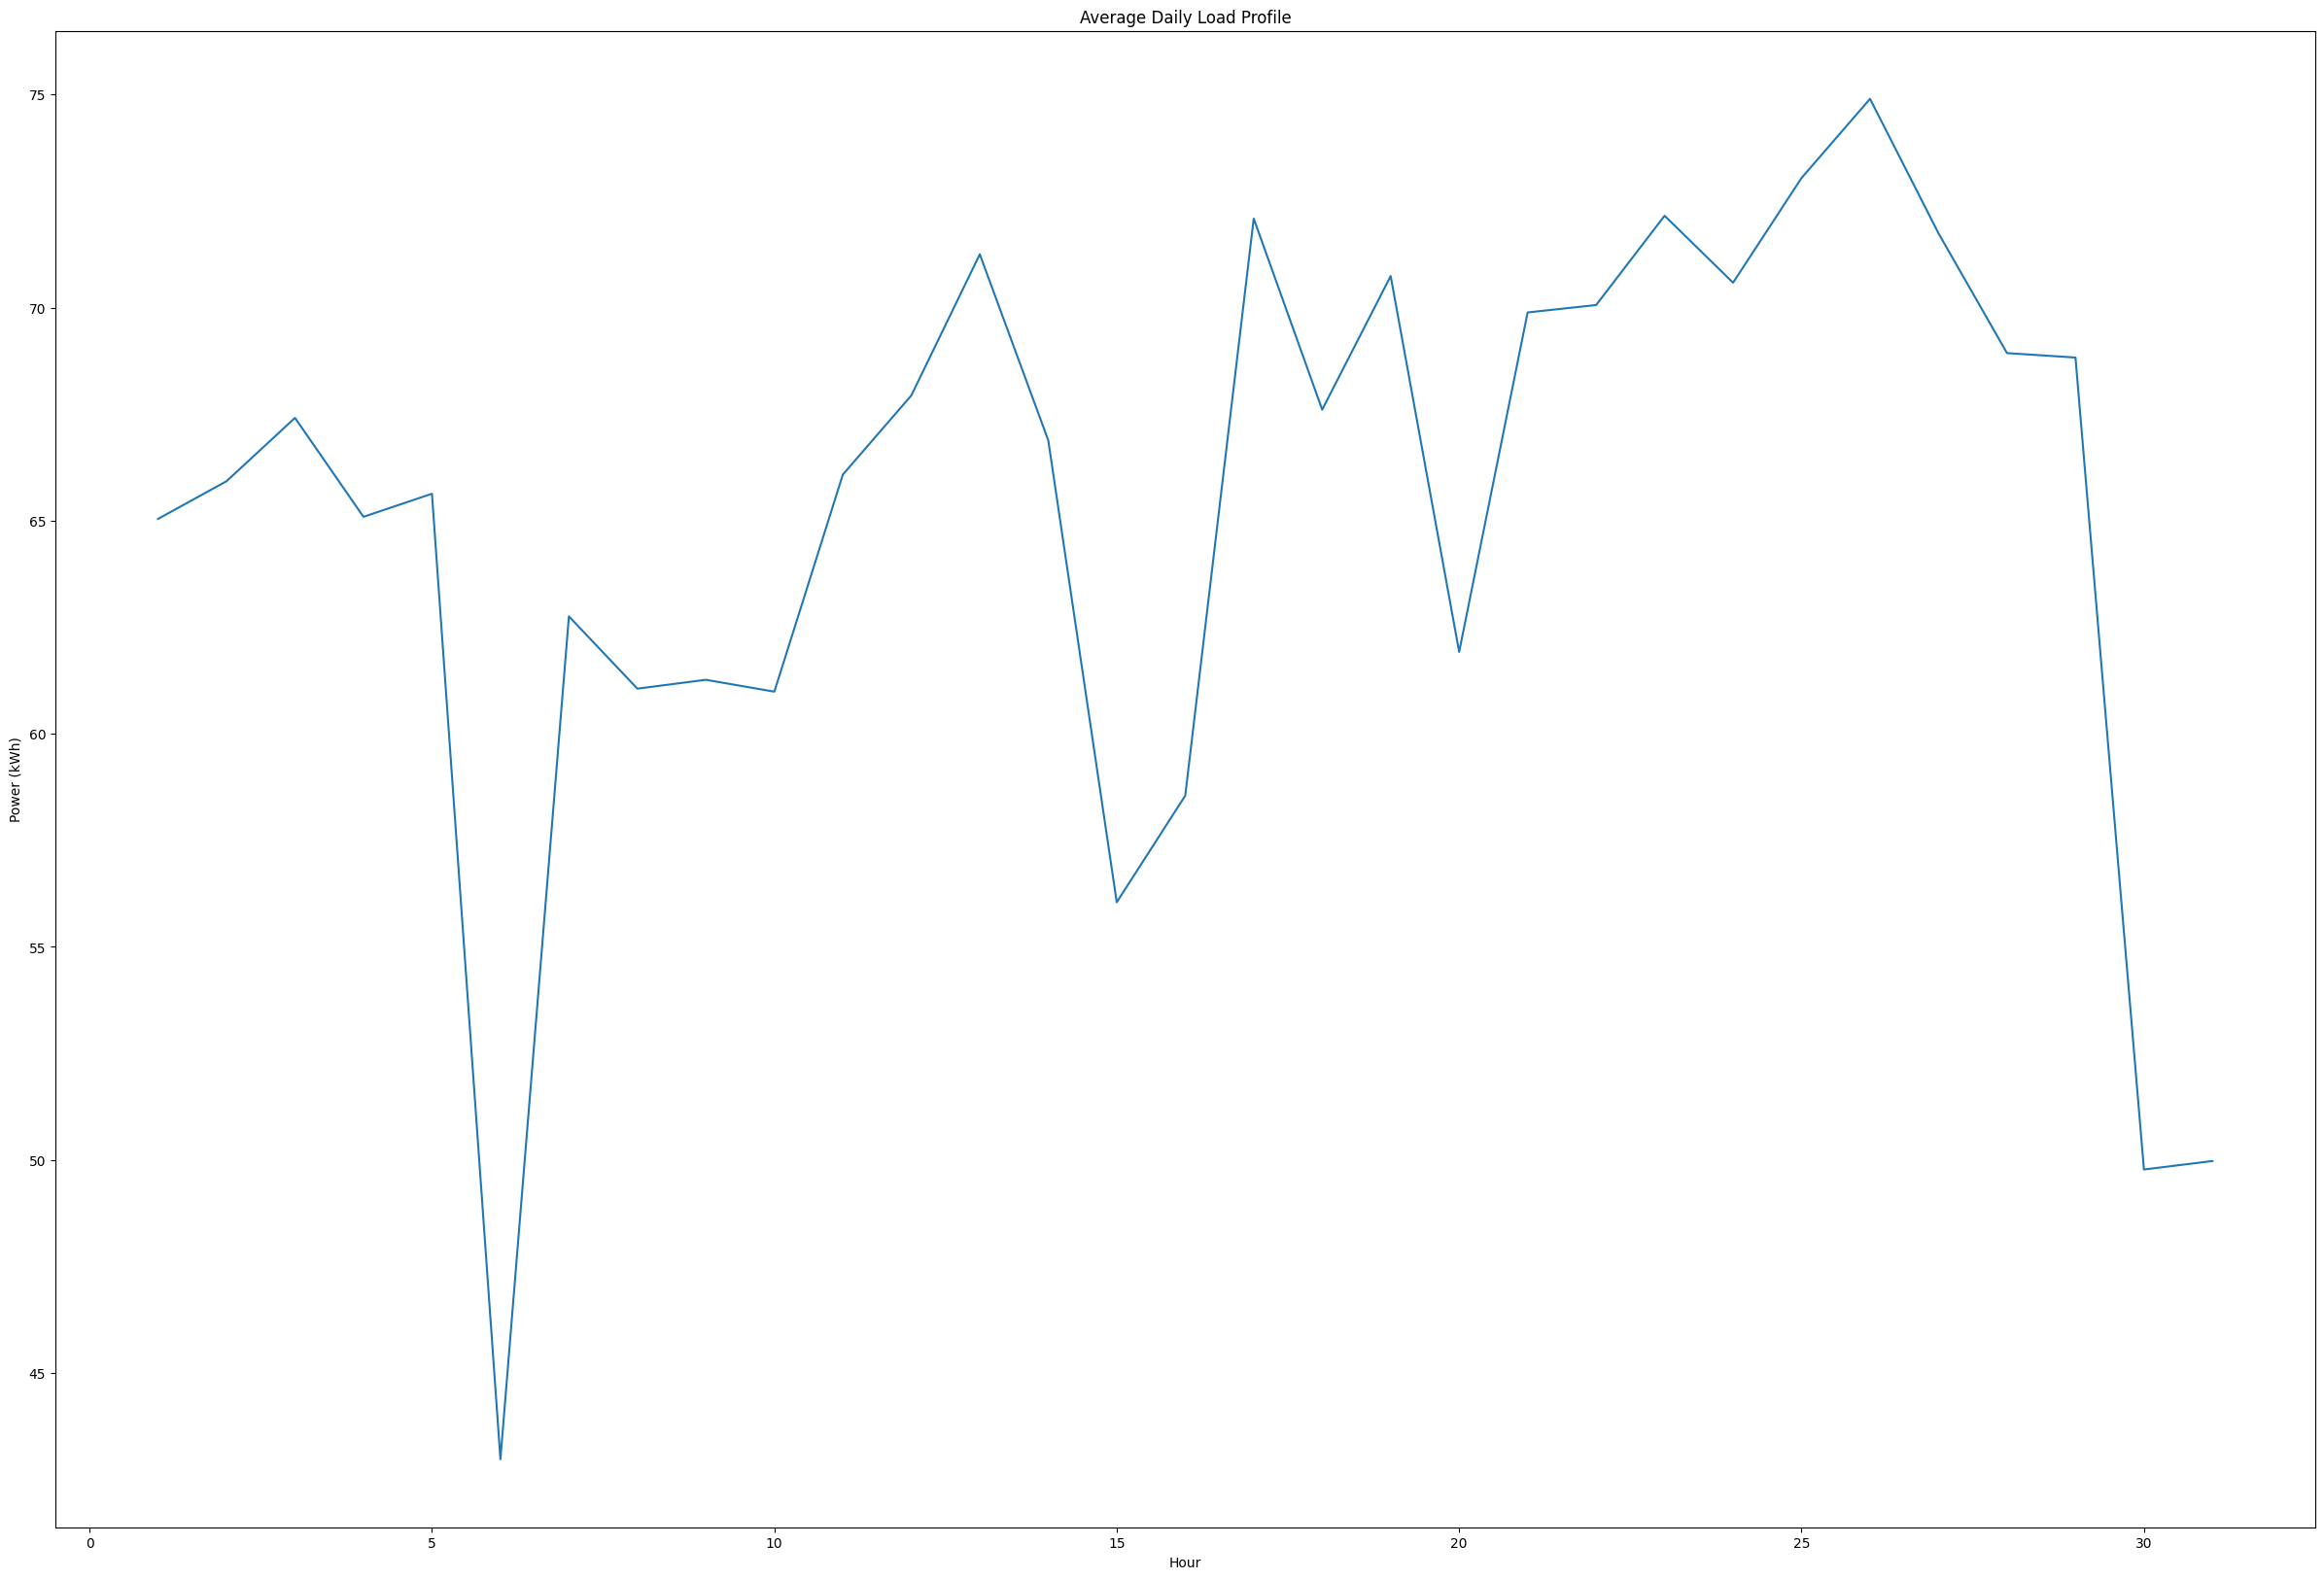

In [156]:

# plot
loadprofile_monthly["total"].plot(figsize=(30,20), title="Average Daily Load Profile", xlabel="Hour", ylabel="Power (kWh)")


In [158]:
data_dict = {}
# store loadprofiles in dict
data_dict["daily"] = loadprofile_daily
data_dict["weekly"] = loadprofile_weekly
data_dict["monthly"] = loadprofile_monthly

# save to pickle
with open('../../data/HES/loadprofile.pkl', 'wb') as f:
    pickle.dump(data_dict, f, pickle.HIGHEST_PROTOCOL)
